### IMPORTAR LIBRERIAS

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [62]:
DF = pd.read_csv("/content/train.csv")
DF = pd.DataFrame(DF)
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### LIMPIEZA DE LOS DATOS

In [63]:

# La columna 'Age' tiene valores nulos. Rellenaremos con la mediana para no perder filas.
DF['Age'] = DF['Age'].fillna(DF['Age'].median())

# La columna 'Embarked' (puerto de embarque) tiene pocos nulos. Rellenaremos con el valor más frecuente (moda).
DF['Embarked'] = DF['Embarked'].fillna(DF['Embarked'].mode()[0])

# La columna 'Cabin' tiene muchísimos valores nulos (NaN). Generalmente se elimina para el modelado básico.
if 'Cabin' in DF.columns:
    DF.drop('Cabin', axis=1, inplace=True)

# Eliminar filas donde todos los valores sean exactamente iguales.
DF.drop_duplicates(inplace=True)

# Los modelos de Machine Learning necesitan números. Convertimos 'Sex' a 0 y 1 de forma robusta.
# Usamos .replace() para una conversión directa y asegurar que no queden NaNs no deseados.
DF['Sex'] = DF['Sex'].replace({'male': 0, 'female': 1})

print("\n--- Información del DataFrame después de la limpieza ---")
print(DF.info())
print(DF.head())


--- Información del DataFrame después de la limpieza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

      

/tmp/ipython-input-3960925051.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF['Sex'] = DF['Sex'].replace({'male': 0, 'female': 1})


### ANALISIS DE LOS DATOS

In [64]:
print("\n--- Información del DataFrame antes del procesamiento ---")
print(DF.info())


--- Información del DataFrame antes del procesamiento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB
None



--- Estadísticas Descriptivas de Columnas Numéricas ---
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75% 

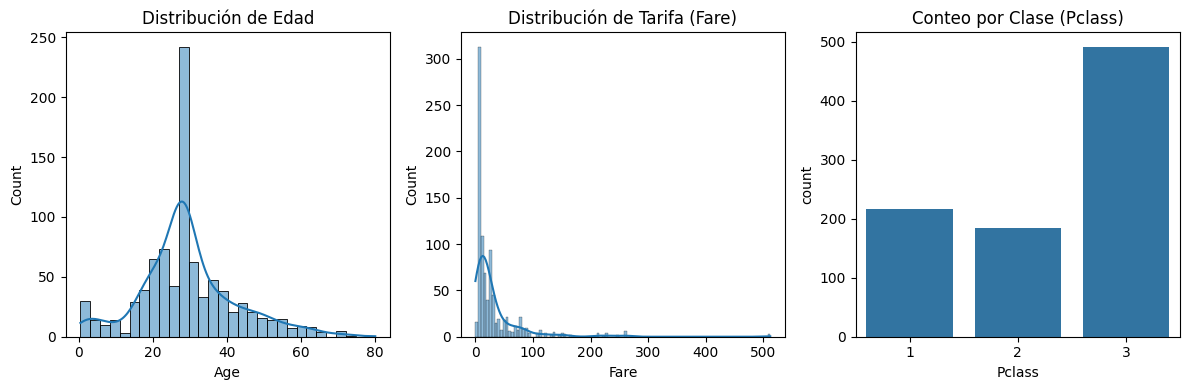

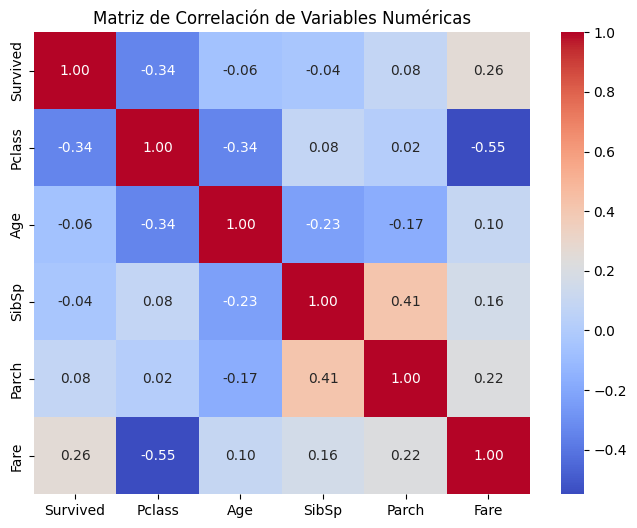


--- Hallazgos Clave de Correlación ---
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


In [65]:
# --- 1. Estadísticas Descriptivas ---
# Muestra la media, desviación estándar, min, max, etc., para columnas numéricas
print("\n--- Estadísticas Descriptivas de Columnas Numéricas ---")
print(DF.describe())

# Muestra la frecuencia de valores únicos para columnas categóricas
print("\n--- Conteo de Puertos de Embarque (Embarked) ---")
print(DF['Embarked'].value_counts())
print("\n--- Conteo de Sexo (Sex) ---")
print(DF['Sex'].value_counts())


# --- 2. Visualización de Distribuciones (Histogramas) ---

plt.figure(figsize=(12, 4))

# Distribución de Edades
plt.subplot(1, 3, 1)
sns.histplot(DF['Age'].dropna(), kde=True) # Usamos dropna() solo para la visualización si hay nulos
plt.title('Distribución de Edad')

# Distribución de Tarifas
plt.subplot(1, 3, 2)
sns.histplot(DF['Fare'], kde=True)
plt.title('Distribución de Tarifa (Fare)')

# Distribución de Clases (Pclass)
plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=DF)
plt.title('Conteo por Clase (Pclass)')

plt.tight_layout()
plt.show()


# --- 3. Análisis de Relaciones (Matriz de Correlación) ---
# Vemos cómo se relacionan las variables numéricas entre sí
# Nota: La columna 'PassengerId' no es útil para la correlación real
numeric_df = DF.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Sex'], axis=1)

plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

print("\n--- Hallazgos Clave de Correlación ---")
print(corr_matrix)

/tmp/ipython-input-3975290437.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sobrevivió')


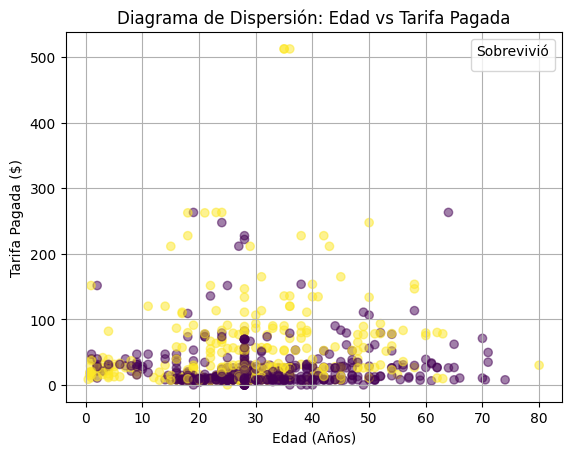

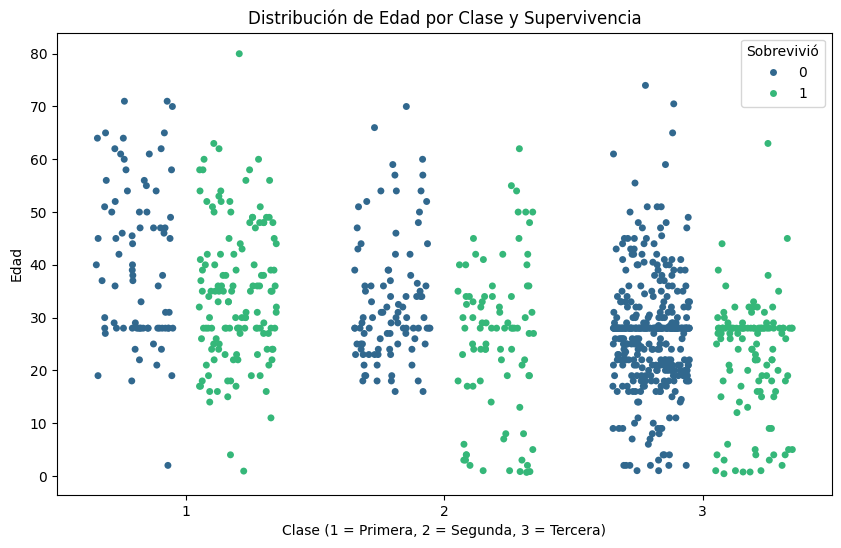

In [66]:
plt.title('Diagrama de Dispersión: Edad vs Tarifa Pagada')
plt.scatter(DF['Age'], DF['Fare'], c=DF['Survived'], cmap='viridis', alpha=0.5)
plt.xlabel('Edad (Años)')
plt.ylabel('Tarifa Pagada ($)')
plt.legend(title='Sobrevivió')
plt.grid(True) # Añade una cuadrícula para mejor lectura

# Mostrar el gráfico
plt.show()

# --- 2. Segundo Ejemplo: Relación entre Edad y Clase (Visualización de puntos) ---

plt.figure(figsize=(10, 6))
sns.stripplot(data=DF, x='Pclass', y='Age', hue='Survived', palette='viridis', jitter=0.3, dodge=True)
plt.title('Distribución de Edad por Clase y Supervivencia')
plt.xlabel('Clase (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.ylabel('Edad')
plt.legend(title='Sobrevivió', loc='upper right')
plt.show()

### PREPROCESAMIENTO DE LOS DATOS

In [67]:
# 1. Manejo de valores nulos (NaN)
# Llenamos la edad con la mediana y Embarked con la moda (el valor más común)
DF['Age'] = DF['Age'].fillna(DF['Age'].median())
DF['Embarked'] = DF['Embarked'].fillna(DF['Embarked'].mode()[0])

# 2. Convertir variables categóricas a numéricas

# Opción A: Variable 'Sex' (Binaria: 0 y 1) - This was already done in a previous cell, so it's removed here.
# DF['Sex'] = DF['Sex'].map({'male': 0, 'female': 1})

# Opción B: Variable 'Embarked' (Usando LabelEncoder para C, Q, S)
le = LabelEncoder()
DF['Embarked'] = le.fit_transform(DF['Embarked'])

# 3. Eliminar columnas que no aportan valor numérico directo (opcional)
# 'Name', 'Ticket' y 'Cabin' suelen requerir ingeniería de variables más compleja
df_procesado = DF.drop(['Name', 'Ticket'], axis=1)

# Ver el resultado
print(df_procesado.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         2
1            2         1       1    1  38.0      1      0  71.2833         0
2            3         1       3    1  26.0      0      0   7.9250         2
3            4         1       1    1  35.0      1      0  53.1000         2
4            5         0       3    0  35.0      0      0   8.0500         2


### MODELAMIENTO DE LOS DATOS

In [68]:
# 1. Definir variables (X: características, y: objetivo)
X = df_procesado.drop(['Survived', 'PassengerId'], axis=1)
y = df_procesado['Survived']

# The Sex column should now be clean from the previous step, so this fillna is no longer needed.
# X['Sex'] = X['Sex'].fillna(X['Sex'].mode()[0])

# 2. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inicializar los modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Bosques Aleatorios (Random Forest)": RandomForestClassifier(n_estimators=100),
    "Máquina de Soporte Vectorial (SVM)": SVC()
}

# 4. Entrenar y Comparar
print("Resultados de los Modelos:\n")
for nombre, modelo in modelos.items():
    # Entrenamiento
    modelo.fit(X_train, y_train)
    # Predicción
    predicciones = modelo.predict(X_test)
    # Evaluación
    accuracy = accuracy_score(y_test, predicciones)
    print(f"{nombre}: Accuracy = {accuracy:.2f}")

Resultados de los Modelos:

Regresión Logística: Accuracy = 0.81
Bosques Aleatorios (Random Forest): Accuracy = 0.83
Máquina de Soporte Vectorial (SVM): Accuracy = 0.66


### EVALUACION DE LOS MODELOS

--- EVALUACIÓN DE MODELOS ---

Modelo: Regresión Logística
Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



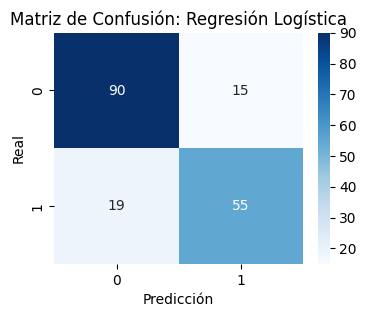

------------------------------
Modelo: Bosques Aleatorios (Random Forest)
Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



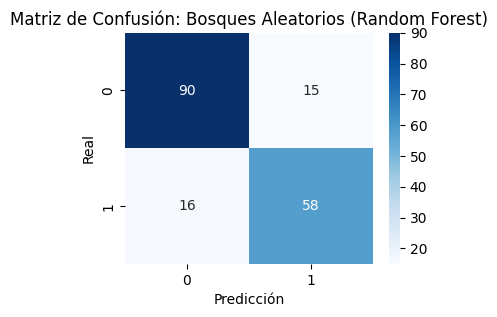

------------------------------
Modelo: Máquina de Soporte Vectorial (SVM)
Accuracy: 0.6592
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



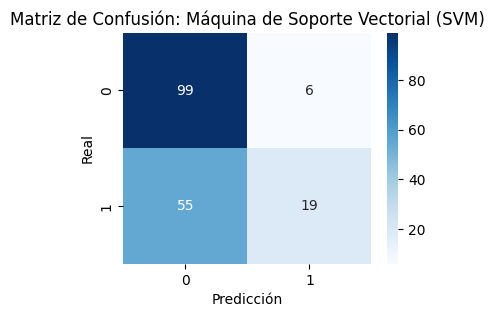

------------------------------

🏆 EL MEJOR MODELO SEGÚN ACCURACY ES: Bosques Aleatorios (Random Forest) con 0.8268


In [69]:
# Diccionario para guardar los resultados y comparar
resultados = {}

print("--- EVALUACIÓN DE MODELOS ---\n")

for nombre, modelo in modelos.items():
    predicciones = modelo.predict(X_test)

    # Cálculo de métricas
    acc = accuracy_score(y_test, predicciones)
    prec = precision_score(y_test, predicciones)
    rec = recall_score(y_test, predicciones)

    resultados[nombre] = acc

    # Imprimir Reporte
    print(f"Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, predicciones))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, predicciones)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    print("-" * 30)

# 5. Determinar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f"\n🏆 EL MEJOR MODELO SEGÚN ACCURACY ES: {mejor_modelo} con {resultados[mejor_modelo]:.4f}")

### CONCLUSIONES (CUAL ES EL MEJOR MODELO PARA PREDECIR SI UN PASAJERO SOBREVIVE O NO

### Tras evaluar los algoritmos, el modelo de Random Forest resultó ser el más efectivo para predecir la supervivencia de los pasajeros, alcanzando una exactitud (accuracy) del 82.68%.